In [1]:
import pandas as pd 
import numpy as np
import math

In [2]:
dataset = pd.read_csv(r'C:/Users/Yukawa/datasets/bitcoin/btc_usd_daily.csv')
dataset

,date,open,close,high,low,change,volume,market_cap
0,2020-03-24,6436.64,6734.80,6789.02,6411.07,4.63,48221910672,123148917787
1,2020-03-23,5831.37,6416.31,6443.93,5785.00,10.03,46491916000,117314776187
2,2020-03-22,6185.56,5830.25,6359.70,5823.71,-5.74,40099664740,106591196069
3,2020-03-21,6206.52,6185.07,6378.14,5932.82,-0.35,42494390880,113068192795
4,2020-03-20,6191.65,6198.78,6844.26,5865.78,0.12,54442976103,113309245860
...,...,...,...,...,...,...,...,...
2517,2013-05-03,106.25,97.75,108.13,79.10,-8.00,0,1085995169
2518,2013-05-02,116.38,105.21,125.60,92.28,-9.60,0,1168517495
2519,2013-05-01,139.00,116.99,139.89,107.72,-15.83,0,1298954594
2520,2013-04-30,144.00,139.00,146.93,134.05,-3.47,0,1542813125


In [3]:
def get_timebin(index, size):
    """
    Return timebin as the change of the values in compared to the mean of the timebin in percent.
    """
    timebin = dataset[index:(index + size)]
    
    result_timebin = pd.DataFrame(timebin['date'])
    
    # open price
    open_mean = timebin['open'].mean()
    result_timebin['open_change%'] =  ( (timebin['open'] - open_mean) / open_mean) * 100
    
    # close price
    close_mean = timebin['close'].mean()
    result_timebin['close_change%'] =  ( (timebin['close'] - close_mean) / close_mean) * 100
    
    # high price
    high_mean = timebin['high'].mean()
    result_timebin['high_change%'] =  ( (timebin['high'] - high_mean) / high_mean) * 100
    
    # low price
    low_mean = timebin['low'].mean()
    result_timebin['low_change%'] =  ( (timebin['low'] - low_mean) / low_mean) * 100
    
    result_timebin.reset_index(drop=True, inplace=True)
    return result_timebin

In [4]:
dataset[450:460]

,date,open,close,high,low,change,volume,market_cap
450,2018-12-30,3822.38,3865.95,3901.91,3797.22,1.14,4770578575,67475512827
451,2018-12-29,3932.49,3820.41,3963.76,3820.41,-2.85,4991655917,66672244158
452,2018-12-28,3653.13,3923.92,3956.14,3642.63,7.41,5631554348,68471837969
453,2018-12-27,3854.69,3654.83,3874.42,3645.45,-5.18,5130222366,63768757101
454,2018-12-26,3819.67,3857.30,3893.36,3769.86,0.99,5326547918,67292819465
455,2018-12-25,4081.03,3815.49,4089.56,3760.02,-6.51,6158207293,66556033172
456,2018-12-24,4000.33,4078.60,4271.79,4000.33,1.96,7240968501,71137548589
457,2018-12-23,4020.99,3998.98,4085.72,3976.41,-0.55,6151275490,69741217417
458,2018-12-22,3898.08,4014.18,4014.18,3855.74,2.98,5605823233,69997508295
459,2018-12-21,4133.70,3896.54,4198.43,3850.95,-5.74,7206015706,67937650255


In [5]:
get_timebin(450,10)

,date,open_change%,close_change%,high_change%,low_change%
0,2018-12-30,-2.531308,-0.685143,-3.056378,-0.385162
1,2018-12-29,0.276440,-1.855049,-1.519705,0.223196
2,2018-12-28,-6.847094,0.804086,-1.709025,-4.440618
3,2018-12-27,-1.707420,-6.108739,-3.739372,-4.366639
4,2018-12-26,-2.600411,-0.907358,-3.268805,-1.102914
5,2018-12-25,4.064132,-1.981442,1.605818,-1.361053
6,2018-12-24,2.006324,4.777759,6.133353,4.943149
7,2018-12-23,2.533144,2.732350,1.510412,4.315641
8,2018-12-22,-0.600997,3.122832,-0.267011,1.150030
9,2018-12-21,5.407190,0.100703,4.310712,1.024371


In [6]:
def find_euclidean_dist(timebin_x, timebin_y, col_name):
    euclidian_distance = pd.DataFrame({
                    'first': timebin_x[col_name],
                    'second': timebin_y[col_name]
                    })
    return math.sqrt(((euclidian_distance['first'] - euclidian_distance['second']) ** 2).sum())

In [7]:
timebin = get_timebin(450,10)
timebin2 = get_timebin(850,10)
find_euclidean_dist(timebin,timebin2, 'open_change%')

20.736661284321027

In [8]:
def timebin_euclidean_dist(timebin_x, timebin_y):
    distance_vector = list()
    
    distance_vector.append( find_euclidean_dist(timebin_x, timebin_y, 'open_change%') )
    distance_vector.append( find_euclidean_dist(timebin_x, timebin_y, 'close_change%') )
    distance_vector.append( find_euclidean_dist(timebin_x, timebin_y, 'high_change%') )
    distance_vector.append( find_euclidean_dist(timebin_x, timebin_y, 'low_change%') )
    
    return distance_vector

In [9]:
timebin_euclidean_dist(timebin, timebin2)

[20.736661284321027, 17.9384518103128, 17.60954408259195, 19.368902589526993]

In [10]:
def get_neighbours(timebin_i, timebin_size, min_timebin_size=5, max_timebin_size=50):
    timebin = get_timebin(timebin_i, timebin_size)
    
    neighbour_timebins = list()
    max_timebin_size += 1 # range ignores last value
    for timebin_size in range(min_timebin_size, max_timebin_size):
        for i in range(0, len(dataset)-timebin_size-1, timebin_size):
            if timebin_i <= i <= (timebin_i+timebin_size):
                    continue

            neighbour_timebin = get_timebin(i, timebin_size)
            dist = timebin_euclidean_dist(timebin, neighbour_timebin)

            # If dist is 0, this means we are taking same bin as the timebin. Ignore these.
            if 0.0 not in dist:
                corr = (1 / dist[0]) + (1 / dist[1]) + (1 / dist[2]) + (1 / dist[3])
                neighbour_timebins.append( (corr, timebin_size, i) )
    df = pd.DataFrame(neighbour_timebins)
    df.columns = ['corr', 'bin_size', 'bin_index']
    df.sort_values(by=['corr'], inplace=True, ignore_index=True, ascending=False)
    return df.loc[df['corr'] > 0.2]

In [11]:
get_neighbours(450, 10)

,corr,bin_size,bin_index
0,0.850263,7,1974
1,0.824392,9,1791
2,0.802579,7,2107
3,0.740476,7,2163
4,0.732219,8,1928
...,...,...,...
3795,0.200290,15,2040
3796,0.200236,12,2352
3797,0.200143,45,1305
3798,0.200112,12,480


In [12]:
def predict_future_changes(neighbours, n_prediction):
    predictions = np.zeros(n_prediction)
    corr_sum = 0.0
    dataset_len = len(dataset)
    for index, row in neighbours.iterrows():
        corr = row['corr']
        bin_size = int(row['bin_size'])
        index = int(row['bin_index'])
        
        start_index = index + bin_size
        if (start_index + n_prediction > dataset_len):
            continue
        
        future_bin = get_timebin(start_index, n_prediction)['close_change%'].values.copy()
        future_bin.resize(predictions.shape)  # if future bin has less cells, fill with 0
        future_bin *= corr
        predictions += future_bin
        corr_sum += corr

    return (predictions / corr_sum) / 100

In [13]:
def predict_future_values(timebin_i, timebin_size, n_predictions):
    timebin = dataset[timebin_i:(timebin_i+timebin_size)]
    bin_mean = timebin['close'].mean()

    neighbours = get_neighbours(timebin_i, timebin_size)
    changes = predict_future_changes(neighbours, n_predictions)

    value_changes = changes * bin_mean
    predictions = timebin['close'].values + value_changes
    
    out = pd.DataFrame({
    'prediction': predictions,
    'actual': dataset[(timebin_i+timebin_size):(timebin_i+timebin_size+n_predictions)]['close'].values
    })
    
    return out

In [14]:
changes = predict_future_changes(get_neighbours(850, 10), 10)
changes

array([ 0.00490107,  0.00533484,  0.00155891,  0.00090826, -0.0003537 ,
       -0.00194202, -0.00286239, -0.00214203, -0.00270716, -0.00269577])

In [15]:
get_timebin(860,10)

,date,open_change%,close_change%,high_change%,low_change%
0,2017-11-15,-2.768608,7.254974,2.472458,1.531443
1,2017-11-14,-3.842515,-2.711599,-5.584238,-1.116121
2,2017-11-13,-12.975856,-3.829666,-4.939306,-10.565085
3,2017-11-12,-7.741144,-12.764526,-7.537177,-15.542830
4,2017-11-11,-3.005284,-6.789626,-4.074558,-5.057092
5,2017-11-10,5.129914,-2.969783,2.050273,-1.496859
6,2017-11-09,9.132153,4.733825,3.932034,8.674251
7,2017-11-08,4.655830,9.368393,8.531972,8.865538
8,2017-11-07,2.922455,4.745554,1.231302,7.474193
9,2017-11-06,8.493055,2.962453,3.917240,7.232560


In [16]:
get_neighbours(850, 10)[:10]

,corr,bin_size,bin_index
0,0.904346,9,1719
1,0.822978,8,336
2,0.801713,9,2430
3,0.800655,8,320
4,0.754748,7,1148
5,0.753513,14,336
6,0.752344,16,336
7,0.747099,11,2431
8,0.740978,12,336
9,0.736789,9,1656


In [17]:
get_timebin(2430,10)

,date,open_change%,close_change%,high_change%,low_change%
0,2013-07-29,4.732062,6.545382,6.246243,6.181520
1,2013-07-28,0.270859,5.029321,4.256069,1.371754
2,2013-07-27,1.991609,-0.908584,0.545225,0.293331
3,2013-07-26,2.979447,1.091774,1.032403,3.528600
4,2013-07-25,0.377078,2.018256,0.887286,1.231559
5,2013-07-24,1.503001,-0.497984,-0.501690,0.293331
6,2013-07-23,-2.703277,0.607477,0.358646,-1.216461
7,2013-07-22,-2.278400,-3.551162,-4.637519,-2.855664
8,2013-07-21,-4.593977,-4.446059,-4.689346,-5.098784
9,2013-07-20,-2.278400,-5.888422,-3.497315,-3.729186


In [18]:
get_timebin(320,10)

,date,open_change%,close_change%,high_change%,low_change%
0,2019-05-09,5.926822,7.594240,6.872591,6.861682
1,2019-05-08,3.574671,4.247325,3.535588,3.510599
2,2019-05-07,1.735304,1.581921,3.504475,2.558148
3,2019-05-06,2.551404,0.141007,0.302985,0.991392
4,2019-05-05,3.248691,0.993114,0.837085,1.962241
5,2019-05-04,2.153181,1.611022,1.753698,0.844559
6,2019-05-03,-2.515176,0.515307,1.390545,-1.929016
7,2019-05-02,-4.341262,-4.067773,-4.548857,-3.643499
8,2019-05-01,-5.253332,-5.855280,-6.350970,-4.475375
9,2019-04-30,-7.080303,-6.760883,-7.297140,-6.680731


In [19]:
result = predict_future_values(1440,50, 50)
result

,prediction,actual
0,432.581672,424.95
1,431.954371,420.74
2,432.246577,437.75
3,429.568084,438.80
4,428.140133,437.16
5,425.225267,420.79
6,425.616151,422.37
7,428.040181,416.32
8,428.166317,407.49
9,428.482021,400.18


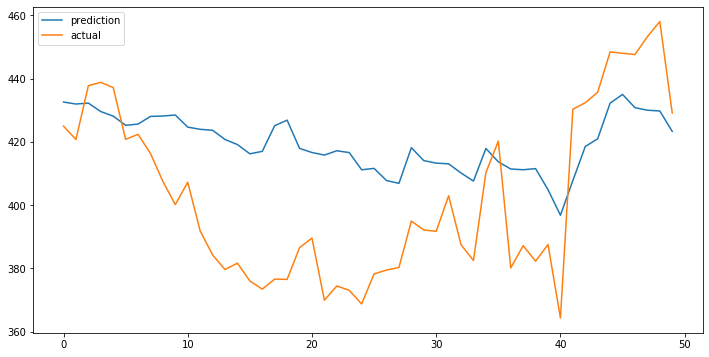

In [20]:
result.plot(figsize=(12,6))

In [21]:
result = predict_future_values(1240,50, 50)
result

,prediction,actual
0,716.523516,606.72
1,717.058046,623.51
2,729.640162,622.86
3,702.660550,626.32
4,700.226018,614.54
5,688.581552,610.44
6,666.503730,606.59
7,658.889005,608.63
8,660.815860,598.21
9,661.557917,575.54


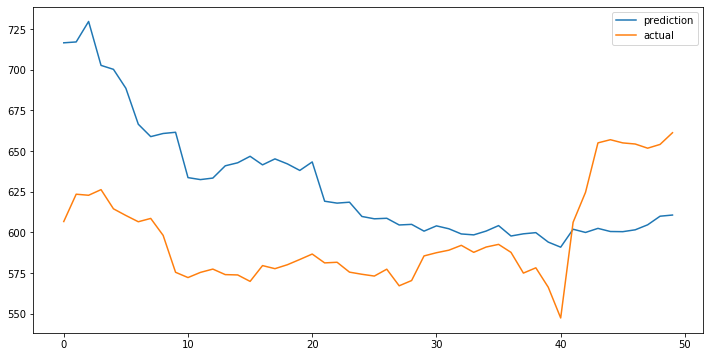

In [22]:
result.plot(figsize=(12,6))

In [23]:
result = predict_future_values(580,50, 50)
result

,prediction,actual
0,6564.723825,6529.59
1,6653.012859,6614.18
2,6458.078885,6385.82
3,6658.453500,6404.00
4,6567.729801,6218.30
5,6698.200393,5903.44
6,6435.888684,6157.13
7,6408.808565,6093.67
8,6284.335716,6249.18
9,6381.543574,6173.23


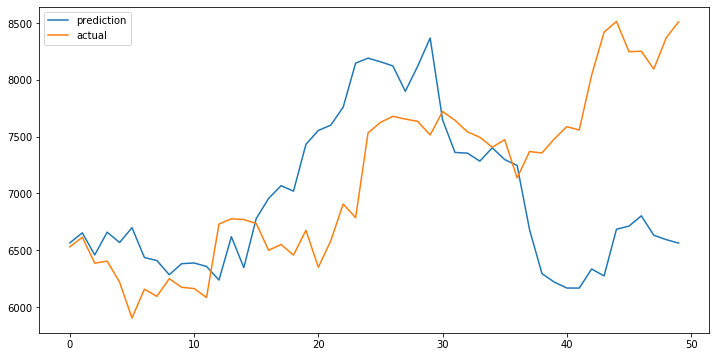

In [24]:
result.plot(figsize=(12,6))

In [25]:
result = predict_future_values(1500,50, 50)
result

,prediction,actual
0,420.011775,417.27
1,403.787347,455.65
2,394.886961,454.98
3,390.021596,442.40
4,391.188059,436.57
5,384.573735,438.64
6,381.352981,442.68
7,384.441075,462.32
8,383.810186,463.62
9,393.136348,456.08


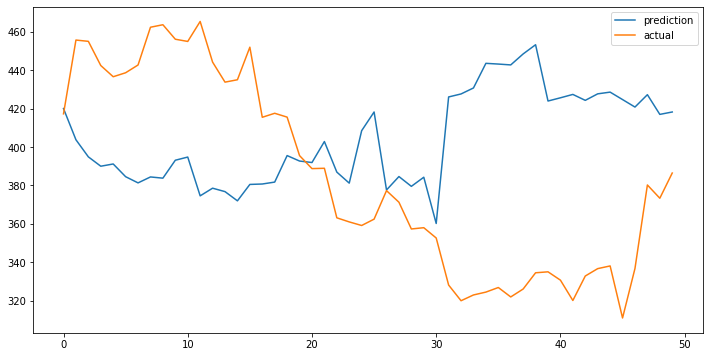

In [26]:
result.plot(figsize=(12,6))

In [27]:
def rmse(predicted_values):
    number_of_predictions = 0
    sum_of_square_differences = 0.0
    for row in predicted_values.itertuples(index=False):
        prediction = row[0]
        actual = row[1]
        
        sum_of_square_differences += (actual - prediction) ** 2
        number_of_predictions += 1
 
    return sum_of_square_differences / number_of_predictions

In [28]:
rmse(result)

5118.5799488526345

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [30]:
r2_score(result['actual'].values, result['prediction'].values)

-1.0366990804882525

In [31]:
mean_squared_error(result['actual'].values, result['prediction'].values)

5118.579948852634